In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC

# Exploratory Data Analysis (EDA) 

In [2]:
# loading in the train data
train_data=pd.read_csv("Train_DF.csv")

In [3]:
# loading in the test data
test_data=pd.read_csv("Test_DF.csv")

In [4]:
train_data

,Loan_ID,Nos_Dep,Education,Self_employed,Annual_income,Loan_amount,Loan_Term,Cibil_score,Residential_assets_value,Commercial_assets_value,Luxury_assets_value,Bank_asset_value,Loan_status
0,1,0.0,Not Graduate,Yes,4100000,12200000.0,8.0,417,2700000,2200000,8800000.0,3300000,0
1,2,3.0,Graduate,No,9100000,29700000.0,20.0,506,7100000,4500000,33300000.0,12800000,0
2,3,3.0,Graduate,No,8200000,30700000.0,8.0,467,18200000,3300000,23300000.0,7900000,0
3,4,5.0,Not Graduate,Yes,9800000,NaN,20.0,382,12400000,8200000,NaN,5000000,0
4,5,0.0,Graduate,Yes,4800000,NaN,10.0,319,6800000,8300000,13700000.0,5100000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2769,2770,3.0,Graduate,Yes,3000000,7500000.0,6.0,881,1400000,4500000,6100000.0,2300000,1
2770,2771,5.0,Graduate,No,1300000,3000000.0,20.0,540,1000000,2300000,3200000.0,1900000,0
2771,2772,5.0,Graduate,Yes,1000000,2300000.0,12.0,317,2800000,500000,3300000.0,800000,0
2772,2773,0.0,Not Graduate,Yes,3300000,11300000.0,20.0,559,4200000,2900000,11000000.0,1900000,1


In [5]:
test_data

,Loan_ID,Nos_Dep,Education,Self_employed,Annual_income,Loan_amount,Loan_Term,Cibil_score,Residential_assets_value,Commercial_assets_value,Luxury_assets_value,Bank_asset_value,Loan_status
0,1,2.0,Graduate,NaN,9600000,29900000.0,12.0,778,2400000,17600000,22700000.0,8000000,0.0
1,2,5.0,Graduate,No,8700000,33000000.0,4.0,678,22500000,14800000,29200000.0,4300000,0.0
2,3,2.0,Graduate,Yes,5700000,15000000.0,20.0,382,13200000,5700000,11800000.0,6000000,0.0
3,4,0.0,Graduate,Yes,800000,2200000.0,20.0,782,1300000,800000,2800000.0,600000,0.0
4,5,3.0,Not Graduate,NaN,5000000,11600000.0,16.0,311,6400000,9600000,14600000.0,4300000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,1491,0.0,Not Graduate,Yes,8900000,27700000.0,6.0,372,18200000,14900000,33700000.0,6100000,0.0
1491,1492,5.0,Graduate,Yes,9700000,22600000.0,NaN,346,23500000,12900000,26800000.0,13000000,0.0
1492,1493,3.0,Graduate,No,5000000,12700000.0,14.0,865,4700000,8100000,19500000.0,6300000,0.0
1493,1494,2.0,Not Graduate,No,6500000,23900000.0,18.0,457,1200000,12400000,18100000.0,7300000,0.0


In [6]:
train_data.info()
#train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0    Loan_ID                   2774 non-null   int64  
 1    Nos_Dep                   2748 non-null   float64
 2    Education                 2774 non-null   object 
 3    Self_employed             2500 non-null   object 
 4    Annual_income             2774 non-null   int64  
 5    Loan_amount               2678 non-null   float64
 6    Loan_Term                 2719 non-null   float64
 7    Cibil_score               2774 non-null   int64  
 8    Residential_assets_value  2774 non-null   int64  
 9    Commercial_assets_value   2774 non-null   int64  
 10   Luxury_assets_value       2563 non-null   float64
 11   Bank_asset_value          2774 non-null   int64  
 12   Loan_status               2774 non-null   int64  
dtypes: float64(4), int64(7), object(2)
memory usage:

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0    Loan_ID                   1495 non-null   int64  
 1    Nos_Dep                   1487 non-null   float64
 2    Education                 1495 non-null   object 
 3    Self_employed             1341 non-null   object 
 4    Annual_income             1495 non-null   int64  
 5    Loan_amount               1445 non-null   float64
 6    Loan_Term                 1459 non-null   float64
 7    Cibil_score               1495 non-null   int64  
 8    Residential_assets_value  1495 non-null   int64  
 9    Commercial_assets_value   1495 non-null   int64  
 10   Luxury_assets_value       1381 non-null   float64
 11   Bank_asset_value          1495 non-null   int64  
 12   Loan_status               1495 non-null   float64
dtypes: float64(5), int64(6), object(2)
memory usage:

# **Details about the dataset**
**The dataset has 13 columns which has details of**

* **Loan ID**
* **Nos_Dep => Number of dependents**
* **Education => Education Level (graduated or not)**
* **Self_employed => Self employed or not**
* **Annual_income => Total Income in a year**
* **Loan_amount => Amount of loan borrowed**
* **Loan_Term => Term to repay loans (in years)**
* **Cibil_score => CIBIL Score**
* **Residential_assets_value => Total residential assets value**
* **Commercial_assets_value => Total commercial assets value**
* **Luxury_assets_value => Total luxury assets value**
* **Bank_asset_value => Total bank asset value**
* **Loan_status => Loan status (1=Accepted, 0= Rejected)**

In [8]:
train_data.columns

Index([' Loan_ID', ' Nos_Dep', ' Education', ' Self_employed',
       ' Annual_income', ' Loan_amount', ' Loan_Term', ' Cibil_score',
       ' Residential_assets_value', ' Commercial_assets_value',
       ' Luxury_assets_value', ' Bank_asset_value', ' Loan_status'],
      dtype='object')

In [9]:
test_data.columns

Index([' Loan_ID', ' Nos_Dep', ' Education', ' Self_employed',
       ' Annual_income', ' Loan_amount', ' Loan_Term', ' Cibil_score',
       ' Residential_assets_value', ' Commercial_assets_value',
       ' Luxury_assets_value', ' Bank_asset_value', ' Loan_status'],
      dtype='object')

In [10]:
li= list(train_data.columns)
new_cols = []
for col in li:
    col = col.replace(' ','')
    new_cols.append(col)

train_data.columns = new_cols

In [11]:
li= list(test_data.columns)
new_cols = []
for col in li:
    col = col.replace(' ','')
    new_cols.append(col)

test_data.columns = new_cols

In [12]:
train_data["Self_employed"] = train_data["Self_employed"].astype(str).str.strip()
train_data["Education"] = train_data["Education"].astype(str).str.strip()

In [13]:
test_data["Self_employed"] = test_data["Self_employed"].astype(str).str.strip()
test_data["Education"] = test_data["Education"].astype(str).str.strip()

In [14]:
#loan ID is irrelevant so it's okay to drop it
train_data.drop(['Loan_ID'],axis=1,inplace=True)

In [15]:
train_data

,Nos_Dep,Education,Self_employed,Annual_income,Loan_amount,Loan_Term,Cibil_score,Residential_assets_value,Commercial_assets_value,Luxury_assets_value,Bank_asset_value,Loan_status
0,0.0,Not Graduate,Yes,4100000,12200000.0,8.0,417,2700000,2200000,8800000.0,3300000,0
1,3.0,Graduate,No,9100000,29700000.0,20.0,506,7100000,4500000,33300000.0,12800000,0
2,3.0,Graduate,No,8200000,30700000.0,8.0,467,18200000,3300000,23300000.0,7900000,0
3,5.0,Not Graduate,Yes,9800000,NaN,20.0,382,12400000,8200000,NaN,5000000,0
4,0.0,Graduate,Yes,4800000,NaN,10.0,319,6800000,8300000,13700000.0,5100000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2769,3.0,Graduate,Yes,3000000,7500000.0,6.0,881,1400000,4500000,6100000.0,2300000,1
2770,5.0,Graduate,No,1300000,3000000.0,20.0,540,1000000,2300000,3200000.0,1900000,0
2771,5.0,Graduate,Yes,1000000,2300000.0,12.0,317,2800000,500000,3300000.0,800000,0
2772,0.0,Not Graduate,Yes,3300000,11300000.0,20.0,559,4200000,2900000,11000000.0,1900000,1


<Axes: xlabel='Loan_status', ylabel='Count'>

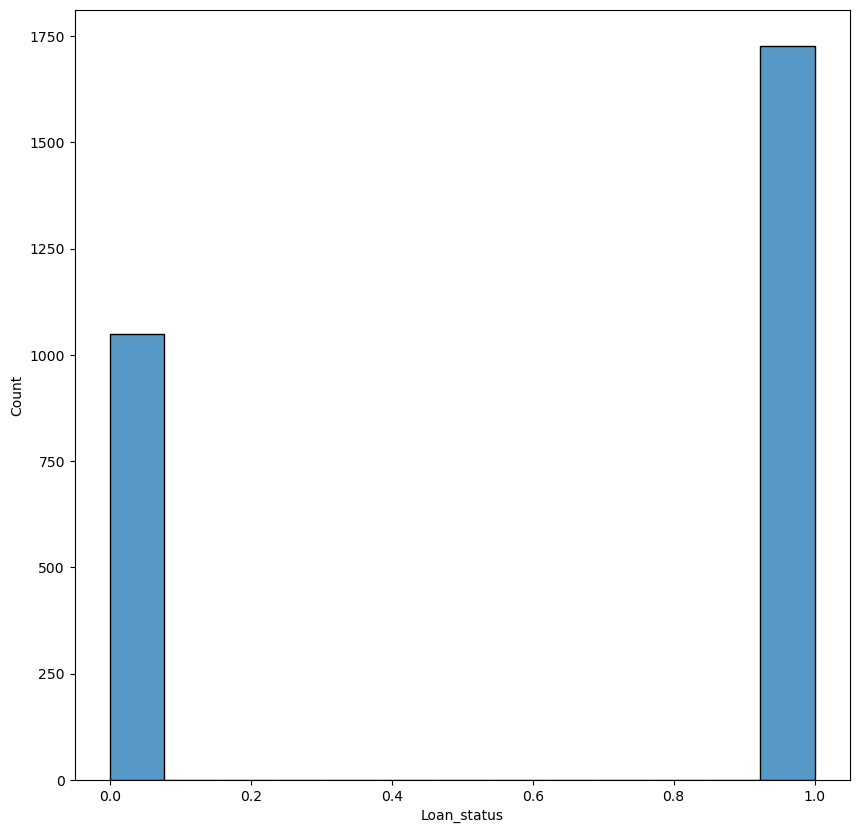

In [16]:
# hist of target variable, Loan Staus
fig, ax = plt.subplots(figsize=(10,10)) 
sns.histplot(train_data, x='Loan_status')

# **Null Value**

In [17]:
# count nun values in dataset
train_data.isnull().sum()

Nos_Dep                      26
Education                     0
Self_employed                 0
Annual_income                 0
Loan_amount                  96
Loan_Term                    55
Cibil_score                   0
Residential_assets_value      0
Commercial_assets_value       0
Luxury_assets_value         211
Bank_asset_value              0
Loan_status                   0
dtype: int64

In [18]:
# count nun values in dataset
test_data.isnull().sum()

Loan_ID                       0
Nos_Dep                       8
Education                     0
Self_employed                 0
Annual_income                 0
Loan_amount                  50
Loan_Term                    36
Cibil_score                   0
Residential_assets_value      0
Commercial_assets_value       0
Luxury_assets_value         114
Bank_asset_value              0
Loan_status                   0
dtype: int64

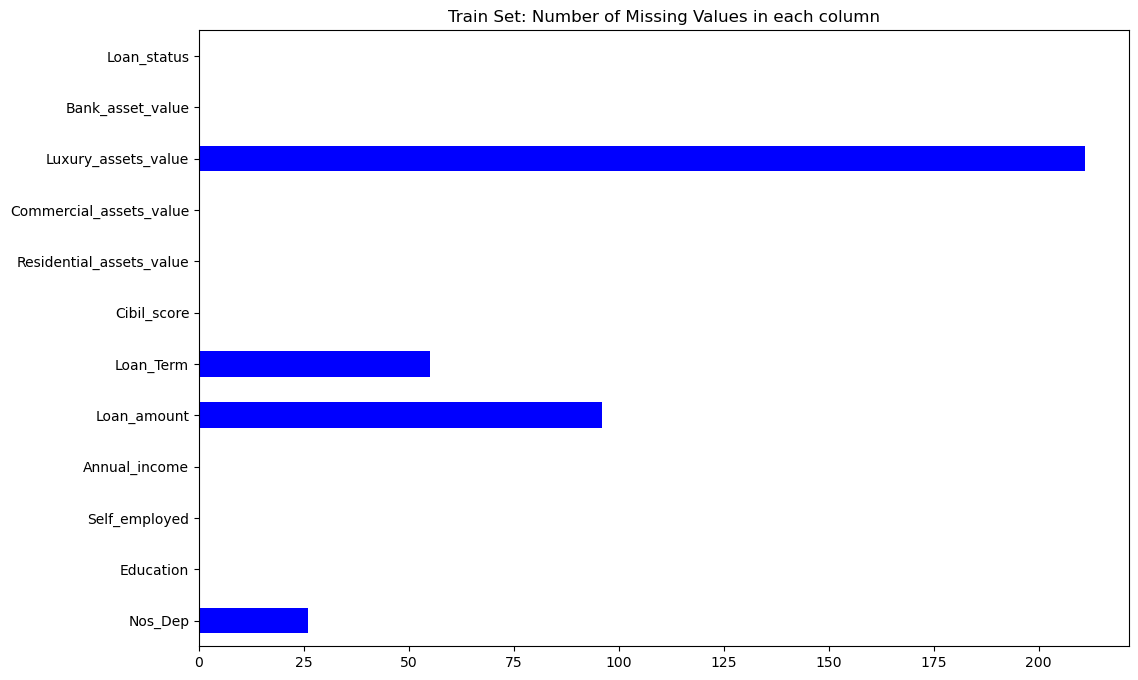

In [19]:
plt.title('Train Set: Number of Missing Values in each column')
train_data.isnull().sum().plot(kind='barh',figsize=(12,8),color='blue')
plt.show()

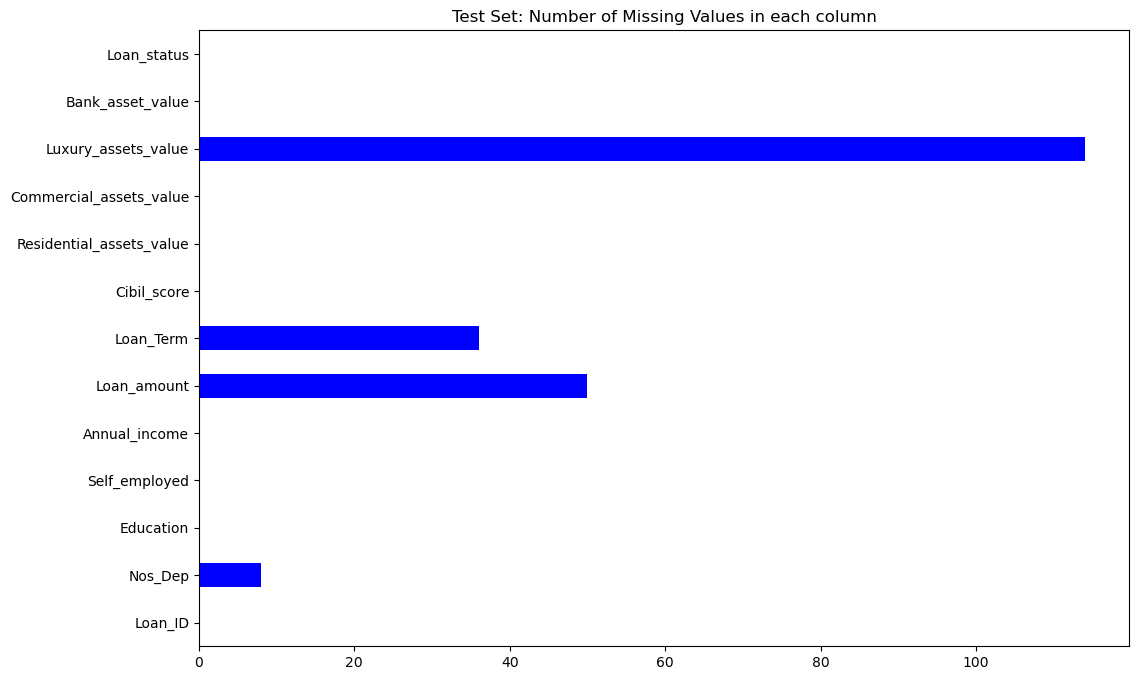

In [20]:
plt.title('Test Set: Number of Missing Values in each column')
test_data.isnull().sum().plot(kind='barh',figsize=(12,8),color='blue')
plt.show()

In [21]:
#fill null values with mode for categorical variables
train_data["Self_employed"].replace('nan', train_data["Self_employed"].mode()[0], inplace=True)

#fill missing values with mean for continuous variable
for col in train_data.columns:
    if train_data[col].dtypes != 'object':
        train_data[col] = train_data[col].fillna(train_data[col].mean()) 

In [22]:
#fill null values with mode for categorical variables
test_data["Self_employed"].replace('nan', test_data["Self_employed"].mode()[0], inplace=True)

#fill missing values with mean for continuous variable
for col in test_data.columns:
    if test_data[col].dtypes != 'object':
        test_data[col] = test_data[col].fillna(test_data[col].mean()) 

# **Label Encoding**

In [23]:
#apply label encoder on the list of categorical columns
label_encoder_education = LabelEncoder();
train_data["Education"]=label_encoder_education.fit_transform(train_data["Education"])

test_data["Education"]=label_encoder_education.transform(test_data["Education"])

In [24]:
#apply label encoder on the list of categorical columns
label_encoder_employment = LabelEncoder();
train_data["Self_employed"]=label_encoder_employment.fit_transform(train_data["Self_employed"])

test_data["Self_employed"]=label_encoder_employment.transform(test_data["Self_employed"])

# **Feature Engineering**

In [25]:
#additonal feature for better training
train_data["Total_asset_value"] = train_data["Luxury_assets_value"] + train_data["Bank_asset_value"] + train_data["Residential_assets_value"] + train_data["Commercial_assets_value"]

In [26]:
#additonal feature for better training
test_data["Total_asset_value"] = test_data["Luxury_assets_value"] + test_data["Bank_asset_value"] + test_data["Residential_assets_value"] + test_data["Commercial_assets_value"]


In [27]:
for col in train_data.columns:
    if train_data[col].dtypes == 'int64':
        train_data[col] = train_data[col].astype(int)

In [28]:
for col in test_data.columns:
    if test_data[col].dtypes == 'int64':
        test_data[col] = test_data[col].astype(int)

In [29]:
#check if any was skipped
train_data.isna().sum()

Nos_Dep                     0
Education                   0
Self_employed               0
Annual_income               0
Loan_amount                 0
Loan_Term                   0
Cibil_score                 0
Residential_assets_value    0
Commercial_assets_value     0
Luxury_assets_value         0
Bank_asset_value            0
Loan_status                 0
Total_asset_value           0
dtype: int64

In [30]:
#check if any was skipped
test_data.isna().sum()

Loan_ID                     0
Nos_Dep                     0
Education                   0
Self_employed               0
Annual_income               0
Loan_amount                 0
Loan_Term                   0
Cibil_score                 0
Residential_assets_value    0
Commercial_assets_value     0
Luxury_assets_value         0
Bank_asset_value            0
Loan_status                 0
Total_asset_value           0
dtype: int64

<Axes: >

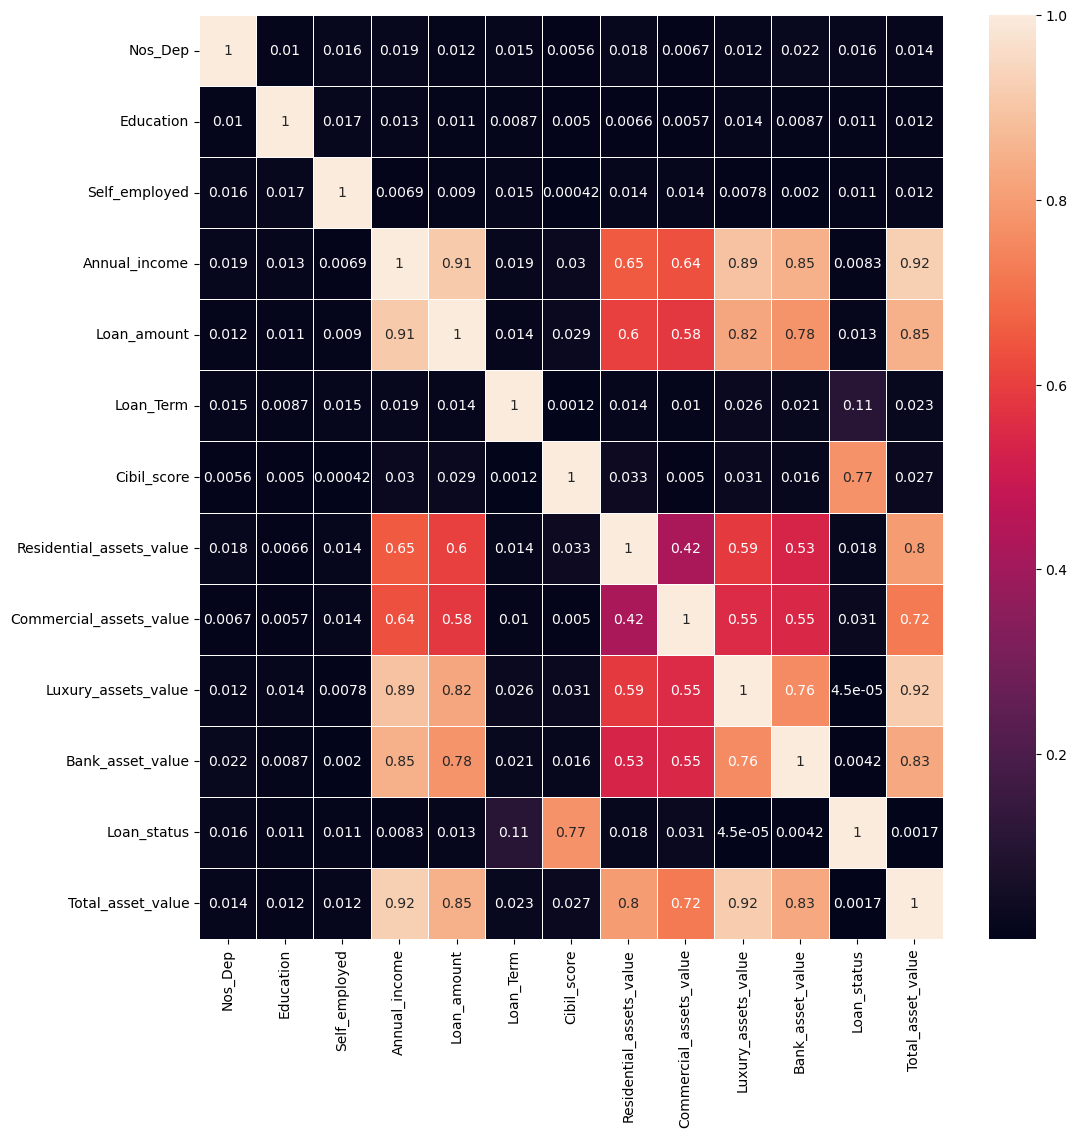

In [31]:
#plot correlation matrix
corr = train_data.corr().abs()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

In [32]:
# get cluomn of coreelation betwen price and other columns
train_data.corr().reset_index()[["index" ,"Loan_status"]]

,index,Loan_status
0,Nos_Dep,-0.016368
1,Education,-0.010707
2,Self_employed,-0.010796
3,Annual_income,-0.008289
4,Loan_amount,0.013450
5,Loan_Term,-0.108582
6,Cibil_score,0.774748
7,Residential_assets_value,-0.017750
8,Commercial_assets_value,0.030883
9,Luxury_assets_value,-0.000045


In [33]:
train_data

,Nos_Dep,Education,Self_employed,Annual_income,Loan_amount,Loan_Term,Cibil_score,Residential_assets_value,Commercial_assets_value,Luxury_assets_value,Bank_asset_value,Loan_status,Total_asset_value
0,0.0,1,1,4100000,1.220000e+07,8.0,417,2700000,2200000,8.800000e+06,3300000,0,1.700000e+07
1,3.0,0,0,9100000,2.970000e+07,20.0,506,7100000,4500000,3.330000e+07,12800000,0,5.770000e+07
2,3.0,0,0,8200000,3.070000e+07,8.0,467,18200000,3300000,2.330000e+07,7900000,0,5.270000e+07
3,5.0,1,1,9800000,1.514907e+07,20.0,382,12400000,8200000,1.509415e+07,5000000,0,4.069415e+07
4,0.0,0,1,4800000,1.514907e+07,10.0,319,6800000,8300000,1.370000e+07,5100000,0,3.390000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2769,3.0,0,1,3000000,7.500000e+06,6.0,881,1400000,4500000,6.100000e+06,2300000,1,1.430000e+07
2770,5.0,0,0,1300000,3.000000e+06,20.0,540,1000000,2300000,3.200000e+06,1900000,0,8.400000e+06
2771,5.0,0,1,1000000,2.300000e+06,12.0,317,2800000,500000,3.300000e+06,800000,0,7.400000e+06
2772,0.0,1,1,3300000,1.130000e+07,20.0,559,4200000,2900000,1.100000e+07,1900000,1,2.000000e+07


In [34]:
test_data

,Loan_ID,Nos_Dep,Education,Self_employed,Annual_income,Loan_amount,Loan_Term,Cibil_score,Residential_assets_value,Commercial_assets_value,Luxury_assets_value,Bank_asset_value,Loan_status,Total_asset_value
0,1,2.0,0,1,9600000,29900000.0,12.000000,778,2400000,17600000,22700000.0,8000000,0.0,50700000.0
1,2,5.0,0,0,8700000,33000000.0,4.000000,678,22500000,14800000,29200000.0,4300000,0.0,70800000.0
2,3,2.0,0,1,5700000,15000000.0,20.000000,382,13200000,5700000,11800000.0,6000000,0.0,36700000.0
3,4,0.0,0,1,800000,2200000.0,20.000000,782,1300000,800000,2800000.0,600000,0.0,5500000.0
4,5,3.0,1,1,5000000,11600000.0,16.000000,311,6400000,9600000,14600000.0,4300000,0.0,34900000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,1491,0.0,1,1,8900000,27700000.0,6.000000,372,18200000,14900000,33700000.0,6100000,0.0,72900000.0
1491,1492,5.0,0,1,9700000,22600000.0,11.040439,346,23500000,12900000,26800000.0,13000000,0.0,76200000.0
1492,1493,3.0,0,0,5000000,12700000.0,14.000000,865,4700000,8100000,19500000.0,6300000,0.0,38600000.0
1493,1494,2.0,1,0,6500000,23900000.0,18.000000,457,1200000,12400000,18100000.0,7300000,0.0,39000000.0


In [35]:
# train_data.describe()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Nos_Dep                   2774 non-null   float64
 1   Education                 2774 non-null   int64  
 2   Self_employed             2774 non-null   int64  
 3   Annual_income             2774 non-null   int64  
 4   Loan_amount               2774 non-null   float64
 5   Loan_Term                 2774 non-null   float64
 6   Cibil_score               2774 non-null   int64  
 7   Residential_assets_value  2774 non-null   int64  
 8   Commercial_assets_value   2774 non-null   int64  
 9   Luxury_assets_value       2774 non-null   float64
 10  Bank_asset_value          2774 non-null   int64  
 11  Loan_status               2774 non-null   int64  
 12  Total_asset_value         2774 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 281.9 KB


In [36]:
# train_data.describe()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Loan_ID                   1495 non-null   int64  
 1   Nos_Dep                   1495 non-null   float64
 2   Education                 1495 non-null   int64  
 3   Self_employed             1495 non-null   int64  
 4   Annual_income             1495 non-null   int64  
 5   Loan_amount               1495 non-null   float64
 6   Loan_Term                 1495 non-null   float64
 7   Cibil_score               1495 non-null   int64  
 8   Residential_assets_value  1495 non-null   int64  
 9   Commercial_assets_value   1495 non-null   int64  
 10  Luxury_assets_value       1495 non-null   float64
 11  Bank_asset_value          1495 non-null   int64  
 12  Loan_status               1495 non-null   float64
 13  Total_asset_value         1495 non-null   float64
dtypes: float

Since the test set is just for inferencing with no ground truth labels, the original train set will be further split into Train and Test to measure the model perfromance

# **Modelling**

In [37]:
#split train data into train_X and train_y
train_X = train_data.drop(["Loan_status"],axis=1);
train_y = train_data.Loan_status

Split data into Train and Test

In [38]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2, shuffle=True,random_state=42)

In [39]:
knn = KNeighborsClassifier(n_neighbors=3) 
rfc = RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state =7)
model = LogisticRegression(C=10, max_iter=300, solver='liblinear', penalty='l1')
svc = SVC()
xgb = XGBClassifier(n_estimators=2, max_depth=5, learning_rate=1, objective='binary:logistic')
lgb = LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)

  
# making predictions on the training set 
for clf in (rfc, knn, svc, model, xgb, lgb):
    clf.fit(X_train, y_train) 
    Y_pred = clf.predict(X_test) 
    print("Accuracy score of ", clf.__class__.__name__, "=",round(100*metrics.accuracy_score(y_test, Y_pred),2))
    print('F1 score: ', f1_score(y_test, Y_pred, average='binary'),'\n')

Accuracy score of  RandomForestClassifier = 96.4
F1 score:  0.9705014749262537 

Accuracy score of  KNeighborsClassifier = 56.58
F1 score:  0.6675862068965518 

Accuracy score of  SVC = 61.98
F1 score:  0.7652947719688543 

Accuracy score of  LogisticRegression = 90.99
F1 score:  0.9260355029585798 

Accuracy score of  XGBClassifier = 96.76
F1 score:  0.9736070381231672 

Accuracy score of  LGBMClassifier = 97.12
F1 score:  0.9764705882352942 



LGBM model had the best F1 score

In [40]:
# LGBM
model = LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, pred))
print('F1 score: ', f1_score(y_test, pred, average='binary'))

Accuracy:  0.9711711711711711
F1 score:  0.9764705882352942


# **Predictions**

Run inference on Test set for submission

In [41]:
X_test

,Nos_Dep,Education,Self_employed,Annual_income,Loan_amount,Loan_Term,Cibil_score,Residential_assets_value,Commercial_assets_value,Luxury_assets_value,Bank_asset_value,Total_asset_value
879,3.0,0,0,7200000,17700000.0,4.0,662,13100000,11500000,1.630000e+07,5300000,4.620000e+07
1988,4.0,0,1,4100000,10400000.0,12.0,727,11900000,5900000,1.509415e+07,4400000,3.729415e+07
889,4.0,1,1,5300000,10700000.0,12.0,700,15800000,1900000,2.050000e+07,2900000,4.110000e+07
912,0.0,0,1,2300000,6000000.0,8.0,690,5500000,2900000,6.000000e+06,2000000,1.640000e+07
1596,2.0,0,0,2700000,9300000.0,16.0,656,7700000,2500000,1.509415e+07,3600000,2.889415e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
238,0.0,1,1,1000000,4000000.0,10.0,620,2400000,1300000,3.700000e+06,1100000,8.500000e+06
1525,5.0,0,1,7300000,26200000.0,10.0,751,1400000,12200000,1.509415e+07,10400000,3.909415e+07
1948,1.0,1,1,7600000,18800000.0,14.0,403,20900000,4700000,2.470000e+07,10000000,6.030000e+07
1701,4.0,0,1,300000,1100000.0,12.0,674,600000,0,8.000000e+05,200000,1.600000e+06


In [42]:
test_data['Loan_status'] = model.predict(test_data.drop(['Loan_ID', 'Loan_status'], axis=1))

In [43]:
test_data.to_csv("Test_DF_with_predictions.csv", index=False)